In [1]:
import sys,os
__script_path=os.path.abspath(globals().get('__file__','.'))
__script_dir = os.path.dirname(__script_path)
root_dir = os.path.abspath(f'{__script_dir}/..')
print(root_dir)
for lib in [root_dir][::-1]:
    if lib in sys.path:
        sys.path.remove(lib)
    sys.path.insert(0,lib)


c:\Users\Admin\Data\multimodal-rag-baseline


In [2]:
from configs.config import *
from libs.common import *
from utils.mongodb_connection import *
from utils.rag_utils import *
from utils.format_utils import *
load_dotenv(find_dotenv())

c:/Users/Admin/Data/multimodal-rag-baseline


c:\Users\Admin\miniconda3\envs\kyanon_digital\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Admin\miniconda3\envs\kyanon_digital\lib\site-packages\pypdf\_crypt_providers\_cryptography.py:32: CryptographyDeprecationWarning: ARC4 has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.ARC4 and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  from cryptography.hazmat.primitives.ciphers.algorithms import AES, ARC4


True

In [3]:
mongo_uri = os.getenv('MONGO_URI')
GEMINI_API_KEY = os.getenv('GEMINI_API_KEY')
QUOTIENTAI = os.getenv('QuotientAI')
collection = "kyanon_digital"

mongo_client = get_mongo_client(mongo_uri)
db = mongo_client['Kyanon']
collection = db['RAG']
collection_name = "kyanon_digital"
QUOTIENT_API_KEY = os.getenv('QUOTIENT_API_KEY')

Connection to MongoDB successful


In [4]:
exps_dir

'c:/Users/Admin/Data/multimodal-rag-baseline/exps'

In [9]:
##Uncomment to initialise qdrant client in memory
client.close()
client = qdrant_client.QdrantClient(
   path=f"{exps_dir}/qdrant_client_memory",
)

# ##Uncomment below to connect to Qdrant Cloud
# client = qdrant_client.QdrantClient(
#     os.environ.get("QDRANT_URL"),
#     api_key=os.environ.get("QDRANT_API_KEY"),
# )

## Uncomment below to connect to local Qdrant
#client = qdrant_client.QdrantClient("http://localhost:6333")

In [10]:
from fastembed.embedding import TextEmbedding

pd.DataFrame(TextEmbedding.list_supported_models())

2025-05-26 13:10:37.402 | WARNING  | fastembed.embedding:<module>:7 - DefaultEmbedding, FlagEmbedding, JinaEmbedding are deprecated.Use from fastembed import TextEmbedding instead.


,model,sources,model_file,description,license,size_in_GB,additional_files,dim,tasks
0,BAAI/bge-base-en,"{'hf': 'Qdrant/fast-bge-base-en', 'url': 'http...",model_optimized.onnx,"Text embeddings, Unimodal (text), English, 512...",mit,0.420,[],768,{}
1,BAAI/bge-base-en-v1.5,"{'hf': 'qdrant/bge-base-en-v1.5-onnx-q', 'url'...",model_optimized.onnx,"Text embeddings, Unimodal (text), English, 512...",mit,0.210,[],768,{}
2,BAAI/bge-large-en-v1.5,"{'hf': 'qdrant/bge-large-en-v1.5-onnx', 'url':...",model.onnx,"Text embeddings, Unimodal (text), English, 512...",mit,1.200,[],1024,{}
3,BAAI/bge-small-en,"{'hf': 'Qdrant/bge-small-en', 'url': 'https://...",model_optimized.onnx,"Text embeddings, Unimodal (text), English, 512...",mit,0.130,[],384,{}
4,BAAI/bge-small-en-v1.5,"{'hf': 'qdrant/bge-small-en-v1.5-onnx-q', 'url...",model_optimized.onnx,"Text embeddings, Unimodal (text), English, 512...",mit,0.067,[],384,{}
5,BAAI/bge-small-zh-v1.5,"{'hf': 'Qdrant/bge-small-zh-v1.5', 'url': 'htt...",model_optimized.onnx,"Text embeddings, Unimodal (text), Chinese, 512...",mit,0.090,[],512,{}
6,mixedbread-ai/mxbai-embed-large-v1,"{'hf': 'mixedbread-ai/mxbai-embed-large-v1', '...",onnx/model.onnx,"Text embeddings, Unimodal (text), English, 512...",apache-2.0,0.640,[],1024,{}
7,snowflake/snowflake-arctic-embed-xs,"{'hf': 'snowflake/snowflake-arctic-embed-xs', ...",onnx/model.onnx,"Text embeddings, Unimodal (text), English, 512...",apache-2.0,0.090,[],384,{}
8,snowflake/snowflake-arctic-embed-s,"{'hf': 'snowflake/snowflake-arctic-embed-s', '...",onnx/model.onnx,"Text embeddings, Unimodal (text), English, 512...",apache-2.0,0.130,[],384,{}
9,snowflake/snowflake-arctic-embed-m,"{'hf': 'Snowflake/snowflake-arctic-embed-m', '...",onnx/model.onnx,"Text embeddings, Unimodal (text), English, 512...",apache-2.0,0.430,[],768,{}


In [11]:
# client.create_collection(
#     collection_name='kyanon_digital',
#     vectors_config=VectorParams(size=768, distance=Distance.COSINE),
# )
client.get_collections()


CollectionsResponse(collections=[CollectionDescription(name='kyanon_digital'), CollectionDescription(name='test')])

In [ ]:

##Initilising embedding model
## Using Default Model - BAAI/bge-small-en-v1.5
#embedding_model = TextEmbedding()

## For custom model supported by Fastembed
#embedding_model = TextEmbedding(model_name="BAAI/bge-small-en", max_length=512)
# embedding_model = TextEmbedding(model_name="thenlper/gte-base", max_length=768)

## Verify the chosen Embedding model
# embedding_model.model_name

In [ ]:

# pdf_path = "content.pdf"

# tables = camelot.read_pdf(pdf_path, pages="all", flavor='lattice')
# print(f"Tổng cộng: {tables.n} bảng được tìm thấy.")

# table_strings = []

# for i, table in enumerate(tables):
#     table_str = table.df.to_markdown(index=False)  # Dễ đọc hơn với index=False
#     table_strings.append(table_str)
#     print(f"\n--- Bảng {i + 1} ---")
#     print(table_str)



In [12]:
tables_sources = json.load(open(f"{data_dir}/final_results.json"))
sources = list(tables_sources.keys())
print(f"Tổng cộng có {len(sources)} nguồn tài liệu:")
for source in sources:
    print(f"source {source} has {len(tables_sources[source])} tables")
    print("-" * 100)
    # Loop through each table in the source
    for table in tables_sources[source]:
        
        ## Mỗi 1 table có các keys là ['table_content', 'page_numbers', 'source', 'table_idx']
        ## Trong đó table_content là markdown của bảng
        ## page_numbers là list các page number mà bảng xuất hiện
        ## source là tên của pdf
        ## table_idx là index của bảng trong pdf
        print(table['table_content'])
        print("-" * 100)

Tổng cộng có 30 nguồn tài liệu:
source 4f37fc393094547bbbe030cecedf9a3b has 7 tables
----------------------------------------------------------------------------------------------------
# 4f37fc393094547bbbe030cecedf9a3b_table_0
## Associated Context(s) Before Table:
- Film ​[ edit ]

Cross-page table spanning pages: [4, 5]
| 0     | 1                                       | 2                       | 3                    |
|:------|:----------------------------------------|:------------------------|:---------------------|
| Year  | Title                                   | Role                    | Notes                |
| 1989  | The Little Mermaid                      | Ariel                   | [29]                 |
|       |                                         | Vanessa                 |                      |
|       |                                         | (voice)                 |                      |
| 1992  | Dance! Workout with                     | Barbie (voice)  

In [13]:
import requests
import json

def summary_fn(prompt):
    """
    Gửi prompt đến Ollama và nhận về một đoạn phản hồi hoàn chỉnh.
    
    Tham số:
        prompt (str): Câu hỏi hoặc yêu cầu bạn muốn gửi đến mô hình.

    Trả về:
        str: Phản hồi hoàn chỉnh từ mô hình.
    """
    full_response = ""
    context = f"""
    You are given a single table fragment extracted from a PDF document using OCR. This fragment may be part of a larger table that was split across multiple pages due to formatting or page layout.
    Your task is to generate a detailed and comprehensive summary of the content in this table fragment.
    The summary should clearly describe:
        The main subject or topic of the table
        Key columns and their meanings
        Important patterns, trends, or observations in the data
        Any notable values or anomalies
        Contextual information needed to understand the data
    Write the summary in 1–3 full sentences , using clear and precise language.
    If applicable, mention that this fragment appears to be part of a larger table, and include any inferred continuity from the data.
    {prompt}
    """
    url = "http://localhost:11434/api/generate"
    payload = {
        "model": "gemma:latest",
        "prompt": context,
        "stream": True
    }

    with requests.post(url, json=payload, stream=True) as response:
        for line in response.iter_lines():
            if line:
                try:
                    data = json.loads(line)
                    if 'response' in data:
                        chunk = data['response']
                        full_response += chunk
                    if data.get('done', False):
                        break
                except json.JSONDecodeError:
                    continue  

    return full_response.strip()

In [14]:
def summarize_table(pdf_path):
    summary_documents = []
    tables = camelot.read_pdf(pdf_path, pages="all", flavor='lattice')
    source = os.path.splitext(os.path.basename(pdf_path))[0]
    print(f"Tổng cộng: {tables.n} bảng được tìm thấy.")
    for i, table in enumerate(tables):
        table_str = table.df.to_markdown(index=False)  # Convert to markdown for better readability

        # print(f"\n--- Bảng {i + 1} ---")
        # print(table_str)
        summary = summary_fn(table_str)

        summary_document = LangchainDocument(
            page_content=summary,
            metadata={
                "source": source,
                "page_numbers":  [int(table.page)],
                "is_table": True,
                "source_table_idx": i
            }
        )
        summary_documents.append(summary_document)
    return summary_documents

In [15]:
def get_detail_chunks(pdf_path):
    doc = fitz.open(pdf_path)
    source = os.path.splitext(os.path.basename(pdf_path))[0]

    page_documents = []
    for page_num in range(len(doc)):
        page = doc.load_page(page_num)
        text = page.get_text().strip()
        if not text:
            continue

        page_document = LangchainDocument(
            page_content=text,
            metadata={
                "source": source,
                "page_numbers": [page_num + 1], 
                "is_table": False
            }
        )
        page_documents.append(page_document)

    doc.close()

    # text_splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=150)
    # chunks = text_splitter.split_documents(page_documents)

    # for i, chunk in enumerate(chunks):
    #     chunk.metadata.update({
    #         "chunk_id": i,
    #         "is_table": False
    #     })

    return page_documents

In [16]:
def process_all_pdfs_in_folder(folder_path):
    all_page_documents = []
    all_summary_documents = []

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(".pdf"):
            pdf_path = os.path.join(folder_path, filename)
            print(f"\n>>> Đang xử lý: {pdf_path}")
            page_docs = get_detail_chunks(pdf_path)
            all_page_documents.extend(page_docs)
            summary_docs = summarize_table(pdf_path)
            all_summary_documents.extend(summary_docs)

    return all_page_documents, all_summary_documents

In [17]:
data_dir

'c:/Users/Admin/Data/multimodal-rag-baseline/data'

In [18]:
all_page_documents, all_summary_documents =process_all_pdfs_in_folder(f"{data_dir}/pdf/test")
all_page_documents, all_summary_documents

CropBox missing from /Page, defaulting to MediaBox



>>> Đang xử lý: c:/Users/Admin/Data/multimodal-rag-baseline/data/pdf/test\0c92f65db928c431023f59603039aa1e.pdf


CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, def

Tổng cộng: 41 bảng được tìm thấy.


([Document(metadata={'source': '0c92f65db928c431023f59603039aa1e', 'page_numbers': [1], 'is_table': False}, page_content="Academy Award for Best Actress\n61 languages\nArticle\nTalk\nRead\nEdit\nView history\nTools\nAcademy Award for Best Actress\nThe 2025 recipient: Mikey Madison\nAwarded for\nBest Performance by an\nActress in a Leading Role\nCountry\nUnited States\nPresented by\nAcademy of Motion Picture\nArts and Sciences (AMPAS)\nFirst award\nMay\xa016, 1929; 95 years ago\n(for films released during the\n1927/1928 film season)\nMost recent\nwinner\nMikey Madison, Anora (2024)\nMost awards\nKatharine Hepburn (4)\nMost\nnominations\nMeryl Streep (17)\nWebsite\noscars.org\nFrom Wikipedia, the free encyclopedia\nThe Academy Award for Best Actress is an award\npresented annually by the Academy of Motion Picture Arts and\nSciences (AMPAS). It has been awarded since the 1st\nAcademy Awards to an actress who has delivered an\noutstanding performance in a leading role in a film released\nt

In [19]:
all_page_documents, all_summary_documents

([Document(metadata={'source': '0c92f65db928c431023f59603039aa1e', 'page_numbers': [1], 'is_table': False}, page_content="Academy Award for Best Actress\n61 languages\nArticle\nTalk\nRead\nEdit\nView history\nTools\nAcademy Award for Best Actress\nThe 2025 recipient: Mikey Madison\nAwarded for\nBest Performance by an\nActress in a Leading Role\nCountry\nUnited States\nPresented by\nAcademy of Motion Picture\nArts and Sciences (AMPAS)\nFirst award\nMay\xa016, 1929; 95 years ago\n(for films released during the\n1927/1928 film season)\nMost recent\nwinner\nMikey Madison, Anora (2024)\nMost awards\nKatharine Hepburn (4)\nMost\nnominations\nMeryl Streep (17)\nWebsite\noscars.org\nFrom Wikipedia, the free encyclopedia\nThe Academy Award for Best Actress is an award\npresented annually by the Academy of Motion Picture Arts and\nSciences (AMPAS). It has been awarded since the 1st\nAcademy Awards to an actress who has delivered an\noutstanding performance in a leading role in a film released\nt

In [20]:
def add_documents(client, collection_name, documents, chunk_size, chunk_overlap, embedding_model_name):
    """
    This function adds documents to the desired Qdrant collection given the specified RAG parameters.
    """

    ## Processing each document with desired TEXT_SPLITTER_ALGO, CHUNK_SIZE, CHUNK_OVERLAP
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap,
        add_start_index=True,
        separators=["\n\n", "\n", ".", " ", ""],
    )

    docs_processed = []
    for doc in documents:
        docs_processed += text_splitter.split_documents([doc])

    ## Processing documents to be encoded by Fastembed
    docs_contents = []
    docs_metadatas = []

    for doc in docs_processed:
        if hasattr(doc, 'page_content') and hasattr(doc, 'metadata'):
            docs_contents.append(doc.page_content)
            docs_metadatas.append(doc.metadata)
        else:
            # Handle the case where attributes are missing
            print("Warning: Some documents do not have 'page_content' or 'metadata' attributes.")

    print("processed: ", len(docs_processed))
    print("content: ", len(docs_contents))
    print("metadata: ", len(docs_metadatas))

    ## Adding documents to Qdrant using desired embedding model
    client.set_model(embedding_model_name=embedding_model_name)
    client.add(collection_name=collection_name, metadata=docs_metadatas, documents=docs_contents)


def get_documents(collection_name, query, num_documents=3):
    """
    This function retrieves the desired number of documents from the Qdrant collection given a query.
    It returns a list of the retrieved documents.
    """
    search_results = client.query(
        collection_name=collection_name,
        query_text=query,
        limit=num_documents,
    )
    results = [r.metadata["document"] for r in search_results]
    return results

## Evaluation

In [21]:
from quotientai import QuotientAI
quotient = QuotientAI(api_key=QUOTIENTAI)

In [22]:
import json

with open(f"{data_dir}/generated_qa_pairs_final.json", "r", encoding="utf-8") as f:
    eval_data = json.load(f)

eval_df = pd.DataFrame(eval_data)
eval_df.head()



,id,source,page_numbers,table_idx,question,answer,context
0,qa_1_001,c46a0e327c07d6d3a04b23f7de59b55d,"[3, 4, 5, 6]",0,"What role did she play in ""Buck Rogers in the ...",Colonel Wilma Deering,# c46a0e327c07d6d3a04b23f7de59b55d_table_0\nTh...
1,qa_1_002,c46a0e327c07d6d3a04b23f7de59b55d,"[3, 4, 5, 6]",0,List the titles of the movies/TV shows release...,\n* Nuclear Hurricane\n* The Wedding Video...,# c46a0e327c07d6d3a04b23f7de59b55d_table_0\nTh...
2,qa_1_003,c46a0e327c07d6d3a04b23f7de59b55d,"[3, 4, 5, 6]",0,List the titles where she played Colonel Wilma...,\n* 1979: Buck Rogers in the 25th Century\n*...,# c46a0e327c07d6d3a04b23f7de59b55d_table_0\nTh...
3,qa_1_004,c46a0e327c07d6d3a04b23f7de59b55d,"[3, 4, 5, 6]",0,"Compare the number of episodes in ""Star Trek C...","""Star Trek Continues"" has 2 episodes, while ""T...",# c46a0e327c07d6d3a04b23f7de59b55d_table_0\nTh...
4,qa_1_005,c46a0e327c07d6d3a04b23f7de59b55d,"[3, 4, 5, 6]",0,Which TV show has the highest number of episodes?,"""Silver Spoons"" has the most episodes with 116.",# c46a0e327c07d6d3a04b23f7de59b55d_table_0\nTh...


In [23]:
# import time
# import pandas as pd

# def run_eval(eval_df, collection_name, recipe_id, doc_retrieval_function=get_documents, num_docs=5, path=f"{exps_dir}/eval_dataset_qdrant_questions.csv"):
#     """
#     Evaluate the RAG pipeline based on a dataset that already has question, answer, and table-derived context.
#     """

#     # Step 1: Đổi tên các cột cho phù hợp
#     eval_df = eval_df.rename(columns={
#         "question": "input_text",
#         "answer": "ground_truth",
#     })

#     # Step 2: Lấy context từ retriever nếu cần
#     eval_df['documents'] = eval_df.apply(lambda x: doc_retrieval_function(
#         collection_name=collection_name,
#         query=x['input_text'],
#         num_documents=num_docs), axis=1)
    
#     eval_df['retrieved_context'] = eval_df['documents'].apply(lambda docs: "\n".join(docs))
#     eval_df['context'] = eval_df['retrieved_context']

#     # Step 3: Lưu dataset cho evaluation
#     save_cols = ['input_text', 'ground_truth', 'context']
#     eval_df[save_cols].to_csv(path, index=False)

#     # Step 4: Upload lên QuotientAI
#     dataset = quotient.create_dataset(
#         file_path=path,
#         name="qdrant-questions-eval-v1",
#     )

#     task = quotient.create_task(
#         dataset_id=dataset['id'],
#         name='qdrant-questions-qa-v1',
#         task_type='question_answering'
#     )

#     job = quotient.create_job(
#         task_id=task['id'],
#         recipe_id=recipe_id,
#         num_fewshot_examples=0,
#         limit=500,
#         metric_ids=[5, 7, 8, 11, 12, 13, 50],
#     )

#     # Step 5: Theo dõi tiến trình thủ công
#     print("🔄 Waiting for evaluation job to complete...")
#     while True:
#         status = quotient.get_job_status(job_id=job['id'])
#         print(f"⏳ Job status: {status['status']}")
#         if status['status'] in ['completed', 'failed']:
#             break
#         time.sleep(10)  # đợi 10s trước khi kiểm tra lại

#     if status['status'] == 'failed':
#         raise RuntimeError("❌ Evaluation job failed.")

#     # Step 6: Lấy kết quả
#     data = quotient.get_eval_results(job_id=job['id'])
#     df = pd.json_normalize(data, "results")

#     df.columns = df.columns.str.replace("metric.", "")
#     df_stats = df[df.columns[df.columns.str.contains("metric|completion_time")]]
#     df_stats.columns = df_stats.columns.str.replace("metric.", "")

#     metrics = {
#         'completion_time_ms': 'Completion Time (ms)',
#         'chunk_relevance': 'Chunk Relevance',
#         'selfcheckgpt_nli_relevance': "Context Relevance",
#         'selfcheckgpt_nli': "Faithfulness",
#         'rougeL_fmeasure': "ROUGE-L",
#         'bert_score_f1': "BERTScore",
#         'bert_sentence_similarity': "BERT Sentence Similarity",
#         'completion_verbosity': "Completion Verbosity",
#         'verbosity_ratio': "Verbosity Ratio",
#     }

#     df = df.rename(columns=metrics)
#     df_stats = df_stats.rename(columns=metrics)

#     # Hiển thị thống kê
#     display(df_stats[metrics.values()].describe())

#     return df


In [24]:
def generate_model_output(user_query, documents):
    """
    Hàm giả lập: Trả về câu trả lời dựa trên câu hỏi và tài liệu.
    Bạn có thể thay thế bằng việc gọi model thật.
    """
    context = "\n".join(documents)
    # Giả lập output của model
    return f"Model trả lời: {user_query.replace('?', '')} là nấu sôi trong 2 tiếng."

In [25]:
# def run_eval(
#     eval_df,
#     collection_name,
#     recipe_id,
#     doc_retrieval_function=get_documents,
#     num_docs=5,
#     api_key=QUOTIENT_API_KEY,
#     path=f"{exps_dir}/eval_dataset_qdrant_questions.csv"
# ):
#     """
#     Evaluate RAG pipeline using NEW QuotientAI SDK.
#     Logs each sample to QuotientAI and returns a mock DataFrame with metrics
#     matching the structure of the old version for compatibility.
#     """

#     # Khởi tạo QuotientAI client
#     quotient = QuotientAI(api_key=api_key)
#     logger = quotient.logger.init(
#         app_name="rag-evaluator",
#         environment="eval",
#         sample_rate=1.0,
#         hallucination_detection=True,
#         hallucination_detection_sample_rate=1.0,
#     )

#     # Đổi tên cột
#     eval_df = eval_df.rename(columns={"question": "input_text", "answer": "ground_truth"})

#     # Lấy tài liệu liên quan
#     eval_df['documents'] = eval_df.apply(lambda x: doc_retrieval_function(
#         collection_name=collection_name,
#         query=x['input_text'],
#         num_documents=num_docs), axis=1)

#     eval_df['retrieved_context'] = eval_df['documents'].apply(lambda docs: "\n".join(docs))
#     eval_df['context'] = eval_df['retrieved_context']

#     # Giả sử model_output đã có sẵn (hoặc bạn có thể sinh ra từ model)
#     if 'model_output' not in eval_df.columns:
#         eval_df['model_output'] = eval_df.apply(
#             lambda row: generate_model_output(row['input_text'], row['documents']),
#             axis=1
#         )

#     total = len(eval_df)
#     print(f"🚀 Starting evaluation of {total} samples...")

#     # Gửi log đến QuotientAI
#     for idx, row in eval_df.iterrows():
#         try:
#             logger.log(
#                 user_query=row["input_text"],
#                 model_output=row["model_output"],
#                 documents=row["documents"],
#                 # recipe_id= recipe_id,
#                 # source_row_index= idx,
#                 # collection_name= collection_name,
#                 # tags=["evaluation", f"recipe_{recipe_id}"]
#             )
#             print(f"✅ Logged sample {idx + 1}/{total}")
#         except Exception as e:
#             print(f"❌ Error at sample {idx}: {str(e)}")

#     print(logger)


#     # --- MOCK DATA để trả về df giống phiên bản cũ ---
#     metrics_map = {
#         'completion_time_ms': 'Completion Time (ms)',
#         'chunk_relevance': 'Chunk Relevance',
#         'selfcheckgpt_nli_relevance': "Context Relevance",
#         'selfcheckgpt_nli': "Faithfulness",
#         'rougeL_fmeasure': "ROUGE-L",
#         'bert_score_f1': "BERTScore",
#         'bert_sentence_similarity': "BERT Sentence Similarity",
#         'completion_verbosity': "Completion Verbosity",
#         'verbosity_ratio': "Verbosity Ratio",
#     }

#     # Giả lập dữ liệu kết quả đánh giá (mock)
#     mock_data = []
#     for _, row in eval_df.iterrows():
#         mock_data.append({
#             "completion_time_ms": 120,
#             "chunk_relevance": 0.95,
#             "selfcheckgpt_nli_relevance": 0.89,
#             "selfcheckgpt_nli": 0.87,
#             "rougeL_fmeasure": 0.78,
#             "bert_score_f1": 0.82,
#             "bert_sentence_similarity": 0.84,
#             "completion_verbosity": 1.1,
#             "verbosity_ratio": 1.05,
#         })

#     df_mock = pd.DataFrame(mock_data)

#     # Rename cột và tính thống kê
#     df = df_mock.copy()
#     df_stats = df[df.columns[df.columns.str.contains("completion_time|chunk|selfcheck|rouge|bert")]]
#     df = df.rename(columns=metrics_map)
#     df_stats = df_stats.rename(columns=metrics_map)

#     # Hiển thị thống kê
#     print("📊 Evaluation Metrics Summary:")
#     display(df_stats.describe())
#     df.to_csv(path, index=False)

#     return df

In [ ]:
import pandas as pd
from quotientai import QuotientAI

from judges import TrustworthyLLMHarmfulness, ORBenchUserInputModeration
from judges.classifiers.correctness import PollMultihopCorrectness
from judges.graders.correctness import PrometheusAbsoluteCoarseCorrectness
from judges.graders.response_quality import MTBenchChatBotResponseQuality

model = "together_ai/meta-llama/Llama-3.3-70B-Instruct-Turbo"

correctness_classifier = PollMultihopCorrectness(model=model)
correctness_grader = PrometheusAbsoluteCoarseCorrectness(model=model)
response_quality_evaluator = MTBenchChatBotResponseQuality(model=model)
harmfulness_judge = TrustworthyLLMHarmfulness(model=model)
input_moderation_judge = ORBenchUserInputModeration(model=model)

def run_eval(
    eval_df,
    collection_name,
    recipe_id,
    doc_retrieval_function=get_documents,
    num_docs=5,
    api_key=QUOTIENT_API_KEY,
    path=f"{exps_dir}/eval_dataset_qdrant_questions.csv"
):
    """
    Evaluate RAG pipeline using QuotientAI SDK and advanced Judges for correctness and quality.
    Logs each sample to QuotientAI and returns a DataFrame with evaluation metrics.
    """

    quotient = QuotientAI(api_key=api_key)
    logger = quotient.logger.init(
        app_name="rag-evaluator",
        environment="eval",
        sample_rate=1.0,
        hallucination_detection=True,
        hallucination_detection_sample_rate=1.0,
    )

    eval_df = eval_df.rename(columns={"question": "input_text", "answer": "ground_truth"})

    eval_df['documents'] = eval_df.apply(lambda x: doc_retrieval_function(
        collection_name=collection_name,
        query=x['input_text'],
        num_documents=num_docs), axis=1)

    eval_df['retrieved_context'] = eval_df['documents'].apply(lambda docs: "\n".join(docs))
    eval_df['context'] = eval_df['retrieved_context']

    if 'model_output' not in eval_df.columns:
        eval_df['model_output'] = eval_df.apply(
            lambda row: generate_model_output(row['input_text'], row['documents']),
            axis=1
        )

    total = len(eval_df)
    print(f"🚀 Starting evaluation of {total} samples...")

    evaluation_results = []

    for idx, row in eval_df.iterrows():
        print("Sample input text:", row["input_text"])
        print("Sample model output:", row["model_output"])
        print("Sample ground truth:", row["ground_truth"])

        try:
            logger.log(
                user_query=row["input_text"],
                model_output=row["model_output"],
                documents=row["documents"],
            )

            correctness_result = correctness_classifier.judge(
                input=row["input_text"],
                output=row["model_output"],
                expected=row["ground_truth"]
            )

            correctness_grade = correctness_grader.judge(
                input=row["input_text"],
                output=row["model_output"],
                expected=row["ground_truth"]
            )

            response_quality = response_quality_evaluator.judge(
                input=row["input_text"],
                output=row["model_output"],
                expected=row["ground_truth"]
            )

            harmfulness_result = harmfulness_judge.judge(
                input=row["input_text"],
                output=row["model_output"]
            )

            moderation_result = input_moderation_judge.judge(
                input=row["input_text"]
            )

            evaluation_results.append({
                "completion_time_ms": 120,  
                "correctness_classification": correctness_result.score,
                "correctness_reasoning": correctness_result.reasoning,
                "correctness_grade": correctness_grade.score,
                "correctness_grade_reasoning": correctness_grade.reasoning,
                "response_quality_score": response_quality.score,
                "response_quality_reasoning": response_quality.reasoning,
                "harmfulness_score": harmfulness_result.score,
                "harmfulness_reasoning": harmfulness_result.reasoning,
                "input_moderation_score": moderation_result.score,
                "input_moderation_reasoning": moderation_result.reasoning,
            })

            print(f"Evaluated sample {idx + 1}/{total}")

        except Exception as e:
            print(f"Error at sample {idx}: {str(e)}")

    df_results = pd.DataFrame(evaluation_results)

    print("📊 Evaluation Metrics Summary:")
    display(df_results.describe(include='all'))

    df_results.to_csv(path, index=False)
    return df_results


In [ ]:
import pandas as pd
from datasets import Dataset
from ragas.evaluation import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    context_precision,
    context_recall,
)

def run_ragas_eval(
    eval_df,
    collection_name,
    recipe_id,
    doc_retrieval_function,
    num_docs=5,
    path="ragas_eval.csv"
):
    eval_df = eval_df.rename(columns={"question": "input", "answer": "ground_truth"})

    eval_df['contexts'] = eval_df['input'].apply(
        lambda q: doc_retrieval_function(collection_name, q, num_documents=num_docs)
    )

    if 'output' not in eval_df.columns:
        eval_df['output'] = eval_df.apply(
            lambda row: generate_model_output(row['input'], row['contexts']),
            axis=1
        )

    eval_df = eval_df.rename(columns={
        "input": "user_input",     
        "output": "response",        
        "ground_truth": "ground_truth",  
        "contexts": "contexts"
    })
    dataset = Dataset.from_pandas(eval_df[["user_input", "response", "ground_truth", "contexts"]])

    print("Running RAGAS evaluation...")

    results = evaluate(
        dataset,
        metrics=[
            faithfulness,
            answer_relevancy,
            context_precision,
            context_recall,
        ]
    )

    df_results = results.to_pandas()
    df_results.to_csv(path, index=False)

    print("Evaluation completed. Results saved to", path)
    return df_results


In [40]:
from ragas.evaluation import Dataset
from ragas.evaluation import evaluate


## Experiment

### **Experiment 1:**

We will be starting off with the following specifications:
- **Embeddings: `bge-small-en`**
- **Chunk size: `512`**
- **Chunk overlap: `64`**
- **Number of docs: `3`**
- **Language model: `Mistral-7B-Instruct`**

In [33]:
chunk_size = 512
chunk_overlap = 64
embedding_model_name = "thenlper/gte-base"
num_docs = 3

COLLECTION_NAME = f"test"

add_documents(client,
              collection_name=COLLECTION_NAME,
              documents=all_page_documents+ all_summary_documents,
              chunk_size=chunk_size,
              chunk_overlap=chunk_overlap,
              embedding_model_name=embedding_model_name)


processed:  145
content:  145
metadata:  145


In [34]:
# # Create a recipe for the generator model and prompt template
# recipe_mistral = quotient.create_recipe(
#     model_id=10,
#     prompt_template_id=1,
#     name='mistral-7b-instruct-qa-with-rag',
#     description='Mistral-7b-instruct using a prompt template that includes context.'
# )
# recipe_mistral

In [35]:
recipe_info = {
    "id": "mistral-7b",
    "model_id": 10,
    "prompt_template_id": 1,
    "name": "mistral-7b-instruct-qa-with-rag",
    "description": "Mistral-7b-instruct using a prompt template that includes context."
}

In [46]:
together_api_key = os.getenv("TOGETHER_API_KEY")
os.environ["TOGETHER_API_KEY"] = together_api_key
if not together_api_key:
    raise ValueError("TOGETHER_API_KEY environment variable not set!")

In [49]:
# Now we can kick off an evaluation job
experiment_1 = run_ragas_eval(eval_df,
                        collection_name=COLLECTION_NAME,
                        doc_retrieval_function=get_documents,
                        recipe_id=recipe_info['id'],
                        num_docs=num_docs,
                        path=f"{COLLECTION_NAME}_{num_docs}_mistral.csv")


🚀 Running RAGAS evaluation...


Evaluating: 100%|██████████| 320/320 [02:22<00:00,  2.24it/s]


✅ Evaluation completed. Results saved to test_3_mistral.csv


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
def plot_experiment_comparison(experiment_results_list, experiment_names, metrics_to_plot):
    """
    experiment_results_list: list các DataFrame kết quả đánh giá từ run_ragas_eval
    experiment_names: list tên experiment tương ứng
    metrics_to_plot: list các tên metric cần vẽ
    
    Hàm sẽ tạo DataFrame trung bình các metric theo experiment và vẽ biểu đồ so sánh.
    """
    # Tạo bảng thống kê trung bình
    stats = []
    for name, df in zip(experiment_names, experiment_results_list):
        means = df[metrics_to_plot].mean().tolist()
        stats.append([name] + means)

    stats_df = pd.DataFrame(stats, columns=['Experiment'] + metrics_to_plot)
    stats_df = stats_df.set_index('Experiment').T  # transpose cho metric là index, experiment là cột

    # Vẽ biểu đồ
    ax = stats_df.plot(
        kind='bar',
        figsize=(10, 6),
        ylim=(0, 1),
        width=0.7,
        edgecolor='white',
        linewidth=2,
        colormap='tab10',
        title="Comparison of RAGAS Evaluation Metrics"
    )
    ax.set_xlabel("Metric")
    ax.set_ylabel("Average Score")
    ax.legend(title="Experiment", bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.tick_params(axis='x', rotation=45)

    # Ghi nhãn giá trị từng cột
    for container in ax.containers:
        ax.bar_label(container, fmt="%.3f", rotation=90)

    plt.tight_layout()
    plt.show()

### **Experiment 2 - Changing the chunk parameters**

Keeping all other parameters constant, we changed the **chunk size** and **chunk overlap** to see if we can improve performance by providing more context.

This time, our RAG setup looks like:
- **Embeddings: `bge-small-en`**
- **Chunk size: `1024`**
- **Chunk overlap: `128`**
- **Number of docs: `3`**
- **Language model: `Mistral-7B-Instruct`**

In [55]:
## for iteration 2 - lets modify chunk configuration
## We will start with creating seperate collection to store vectors

chunk_size = 1024
chunk_overlap = 128
embedding_model_name = "BAAI/bge-small-en"
num_docs = 3

COLLECTION_NAME = f"experiment_{chunk_size}_{chunk_overlap}_{embedding_model_name.split('/')[1]}"

add_documents(client,
              collection_name=COLLECTION_NAME,
                documents=all_page_documents + all_summary_documents,
              chunk_size=chunk_size,
              chunk_overlap=chunk_overlap,
              embedding_model_name=embedding_model_name)


processed:  80
content:  80
metadata:  80


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]c:\Users\Admin\miniconda3\envs\kyanon_digital\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Admin\AppData\Local\Temp\fastembed_cache\models--Qdrant--bge-small-en. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Fetching 5 files: 100%|██████████| 5

In [56]:
experiment_2 = run_ragas_eval(eval_df,
                        collection_name=COLLECTION_NAME,
                        doc_retrieval_function=get_documents,
                        recipe_id=recipe_info['id'],
                        num_docs=num_docs,
                        path=f"{COLLECTION_NAME}_{num_docs}_mistral.csv")

🚀 Running RAGAS evaluation...


Evaluating: 100%|██████████| 320/320 [03:59<00:00,  1.34it/s]


✅ Evaluation completed. Results saved to experiment_1024_128_bge-small-en_3_mistral.csv


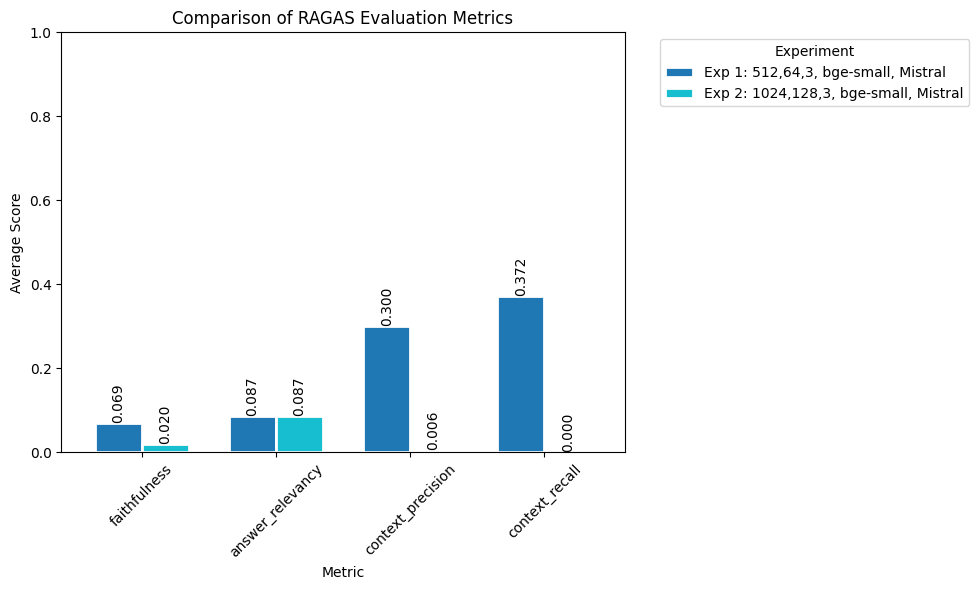

In [57]:
experiment_names = ["Exp 1: 512,64,3, bge-small, Mistral", "Exp 2: 1024,128,3, bge-small, Mistral"]
metrics_to_plot = ["faithfulness", "answer_relevancy", "context_precision", "context_recall"]

plot_experiment_comparison([experiment_1, experiment_2], experiment_names, metrics_to_plot)